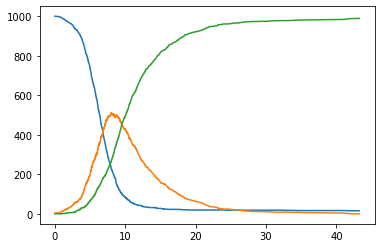

In [58]:
#Example of a continous time markov model implementation of an SIR model
import numpy as np
import random
import math
import matplotlib.pyplot as plt 

def simulation(inits, k, g, d_max):

    #initialize some arrays. we will just append as we go but note that this is actually much slower than preallocating memory, I'm just too 
    #exhausted to be "proper" right now
    S, I, R, days = [0], [0], [0], [0]
    S[0], I[0], R[0]=inits
    
    #This is a constant
    N=np.sum(inits)

    d=0
    #run loop until max day
    while d< d_max and I[-1]>0:

        #Rather than advance one step at a time, we can use the probability that *nothing* happens to figure out how long we should wait before
        #the next event. Recall from the slides that this probability can be calculated by hand. Here it will be 1-e^(- k IS/n - g I). This is         #a poisson distribution. Unfortunately random.random() draws from the uniform distribution [0,1) so we will need to transform our 
        #variable. For a detailed discussion see https://towardsdatascience.com/the-poisson-process-everything-you-need-to-know-322aa0ab9e9a

        #random number from [0,1)
        rand= random.random()

        #rate that something happens, ie the rate that either an infection *or* a recovery happens
        infrate=k*I[-1]*S[-1]/N  # I[-1] means last element in list I
        recrate= g*I[-1]
        rate= k*I[-1]*S[-1]/N + g*I[-1]

        #transform to poisson and add the interval to the current time
        d_event = -math.log(1.0 - rand)/(rate) + d

        #track the days so we can plot against them
        days.append(d_event)

        #so at time t_event, we know *something happens*. We now work out the relative probability of each and "roll a die" to figure out
        # what the next step is. If infection happens with rate kIS/N and recovery happens with g I, then the relative probabilities of
        # each are (kIS/N)/(kIS/N + gI)   and (gI)/(kIS/N + gI)  respectively
        whichevent= random.choices([1,0], [infrate/rate, recrate/rate])[0]
        #now we do the event chosen
        if whichevent == 1:
            I.append(I[-1]+1)
            S.append(S[-1]-1)
            R.append(R[-1])
        elif whichevent == 0:
            I.append(I[-1]-1)
            S.append(S[-1])
            R.append(R[-1]+1)
        else:
            print("ERROR, something is horribly wrong")
            break
        
        #update current time
        d=d_event

    #At the end return resutlts
    return S, I, R, days



S, I, R, days = simulation([1000,5,0], 1, 0.2, 60)
plt.plot(days,S)
plt.plot(days,I)
plt.plot(days,R)
plt.show()





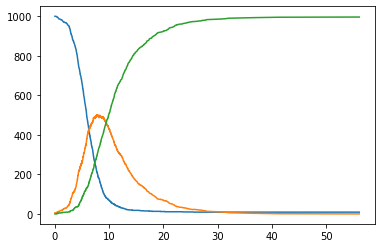